# Regresion

Cristobal Donoso Oliva<br>
Universidad de Concepcion, Chile<br>
cridonoso@inf.udec.cl<br>


_Viernes 30 de Octubre del 2020_

Cuando hacemos **regresion** tratamos de modelar la relacion entre variables independientes (predictores) $\boldsymbol{x} \in \mathbb{R}^D$ y una o mas variables de repuesta $y \in \mathbb{R}$. 

Los metodos de regresion son muy parecidos a los de clasificacion, sin embargo, en regresion la **variable de repuesta es continua**.

## Regresion Lineal

> *La Regresion Lineal es el caballo de batalla en estadistica y machine learning. Cuando es transformada con kernels u otras formas de expansion de la funcion base, podemos modelar relaciones no lineales en los datos. Y cuando el output Gaussiano es reemplazado por una distribucion de Bernoulli puede ser usada como clasificacion.* (Kevin. P Murphy (2012) Machine Learning: A probabilistic Perspecive, pag 217)

Formalmente decimos que la variable de respuesta $\hat{y}(\boldsymbol{x})$ viene dada por:
\begin{eqnarray}
    \hat{y}(\boldsymbol{x}) & = & \boldsymbol{w}^{\top}\boldsymbol{x} + \epsilon \\ \\
     &=& \begin{bmatrix}
           w_{1} \\
           w_{2} \\
           \vdots \\
           w_{D}
         \end{bmatrix} \begin{bmatrix} x_1 & x_2 & \cdots & x_D \end{bmatrix} + \epsilon \\\\
         & = & \sum_{j=1}^D w_jx_j + \epsilon
\end{eqnarray}

Donde $\epsilon$ es el error del modelo y $\boldsymbol{w}$ son los parametros del modelo. Usualmente asumimos $\epsilon \sim \mathcal{N}(0, \sigma^2)$.

El **Problema de Optimizacion** a resolver encontrar los parametros optimos que minimicen la funcion de costo. 

Por ejemplo si utilizamos el error medio cuadratico (MSE):
\begin{eqnarray}
MSE &=& \frac{1}{N-1}\sum_{i=1}^{N} (y_i - \hat{y}_i)^2 \\
    &=& \frac{1}{N-1}\sum_{i=1}^{N} (y_i - (\boldsymbol{w}^{\top}\boldsymbol{x}_i + \epsilon))^2 
\end{eqnarray}
donde $N$ es la cantidad de muestras en el conjunto de datos. Analiticamente podemos encontrar el valor optimo de los parametros haciendo:
<br><br>
\begin{eqnarray}
    \frac{\partial MSE}{\partial \boldsymbol{w}} &=& 0 \Rightarrow \boldsymbol{w} = \begin{bmatrix}\frac{\partial MSE}{\partial w_0} = 0 \\
    \frac{\partial MSE}{\partial w_1} = 0 \\
    \vdots \\
    \frac{\partial MSE}{\partial w_D} = 0\end{bmatrix}
\end{eqnarray}
<br><br>
Sin embargo existe un metodo iterativo el cual permite converger a la solucion sin necesidad de resolver la igualdad: **Gradiente Descendente**.

### Gradiente Descendente desde 0

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

En la seccion anterior calculamos la derivada con respecto a los parametros del modelo. La derivada nos da una **razon de cambio**, la cual es 0 cuando se encuentra en un valle o solucion.

In [3]:
x = np.linspace(0.0, 10.0, num=10)

w_0 = 1.3 # w_1
b = 0.5

obs_noise = np.random.randn(x.shape[0])
y = w_0*x + b + 0.5*obs_noise

In [4]:
def prediction(x, w, b):
    return x*w + b

In [5]:
def MSE(y, y_pred):
    error = y - y_pred
    return np.mean(np.power(error, 2))

Calculamos las derivadas parciales con respecto a los parametros del modelo:
\begin{eqnarray}
\frac{\partial}{\partial  w}\left( \frac{1}{N}\sum_{i=1}^N(y_i - w x_i - b)^2\right) &=& \frac{-2}{N}\sum_{i=1}^N x_i(-b-wx_i+y_i)\\
\frac{\partial}{\partial  b}\left( \frac{1}{N}\sum_{i=1}^N(y_i - w x_i - b)^2\right)&=& \frac{2}{N}\sum_{i=1}^N(b+wx_i-y_i)
\end{eqnarray}

In [6]:
def dMSEdw(x, y, w, b):
    return np.mean(-2*x*(-b-w*x+y))
def dMSEdb(x, y, w, b):
    return np.mean(2*(b+w*x-y))

In [7]:
w_candidatos = np.sort(np.random.uniform(-5, 5, 10))
b_candidatos = np.sort(np.random.uniform(-1, 1, 10))

errores = []
grads_w = []
grads_b = []
for wc, bc in zip(w_candidatos, b_candidatos):
    y_pred = wc*x + bc
    error  = MSE(y, y_pred)

    errores.append(error)
    grads_w.append(dMSEdw(x, y, wc, bc))
    grads_b.append(dMSEdb(x, y, wc, bc))

In [8]:
eta = 1e-2

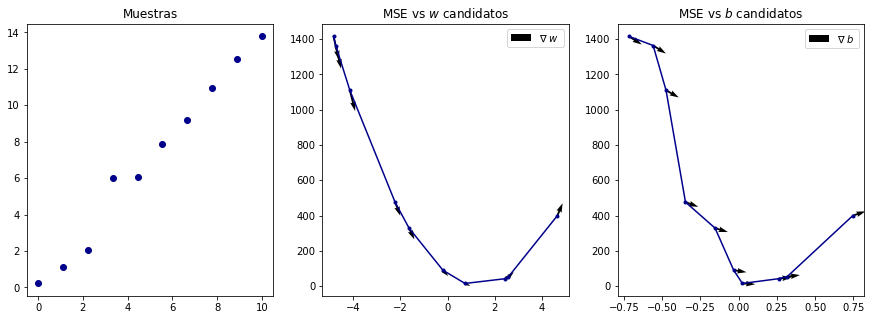

In [9]:
from matplotlib.patches import FancyArrowPatch
fig, axes = plt.subplots(1,3, figsize=(15,5))
axes[0].plot(x, y, 'o', color='darkblue')
axes[1].plot(w_candidatos, errores, '.-', color='darkblue')
axes[2].plot(b_candidatos, errores, '.-', color='darkblue')

axes[1].quiver(w_candidatos, errores, np.ones(len(errores)), eta*np.array(grads_w),  label=r'$\nabla \ w$')
axes[2].quiver(b_candidatos, errores, np.ones(len(errores)), eta*np.array(grads_b), label=r'$\nabla \ b$')

axes[0].set_title('Muestras')
axes[1].set_title('MSE vs $w$ candidatos')
axes[2].set_title('MSE vs $b$ candidatos')

axes[1].legend()
axes[2].legend()

plt.show()

La regla de actualizacion de parametros en funcion del gradiente $\nabla w$ y $\nabla b$ es la siguiente:
\begin{eqnarray}
    \vec{\nabla} w = \frac{\partial MSE}{\partial w} & \hspace{5mm} y \hspace{5mm}&  \vec{\nabla} b = \frac{\partial MSE}{\partial b}\\
    \hat{w} = w - \eta\vec{\nabla} w & \hspace{5mm} y \hspace{5mm}&\hat{b} = b - \eta\vec{\nabla} b 
\end{eqnarray}

In [10]:
def actualizar_pesos(x, y, w, b, eta=0.1):   
    # Gradientes
    eta_w = dMSEdw(x, y, w, b)
    eta_b = dMSEdb(x, y, w, b)
    
    # Actualizacion de parametros
    w_hat = w - eta*eta_w
    b_hat = b - eta*eta_b
    
    return w_hat, b_hat

In [11]:
w = np.random.uniform(5, 10) # definimos parametros aleatorios
b = np.random.uniform(5, 10)

num_iter = 1000
perdidas = []
lr = 1e-2 #learning rate o taza de aprendizaje
for iteracion in range(num_iter):
    y_pred = prediction(x, w, b)
    mse = MSE(y, y_pred)
    perdidas.append(mse)
    w, b = actualizar_pesos(x, y, w, b, eta=lr)

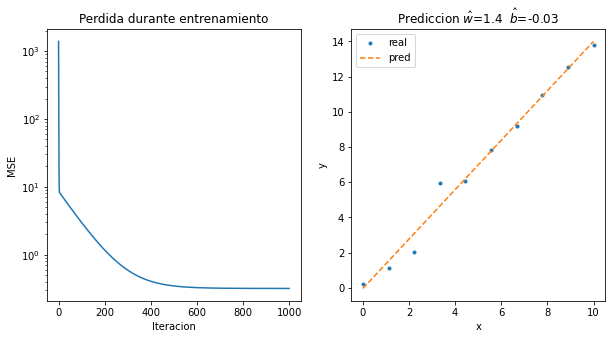

In [12]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].plot(perdidas)
axes[0].set_yscale('log')
axes[0].set_ylabel('MSE')
axes[0].set_xlabel('Iteracion')
axes[0].set_title('Perdida durante entrenamiento')

axes[1].plot(x, y, '.', label='real')
axes[1].plot(x, y_pred, '--', label='pred')
axes[1].set_ylabel('y')
axes[1].set_xlabel('x')
axes[1].legend()
axes[1].set_title(r'Prediccion $\hat{w}$='+str(round(w, 2))+'  $\hat{b}$='+str(round(b, 2)))

plt.show()

[Lo anterior es equivalente](https://www.jessicayung.com/mse-as-maximum-likelihood/) a decir que la variable de respuesta $\hat{y}$ viene dada por la distribucion condicional:

\begin{eqnarray}
p(y|x, \theta) \sim \mathcal{N}(\mu(x), \sigma(x))
\end{eqnarray}

donde $\mu(x)$ es la funcion lineal $\mu(x) = \boldsymbol{w}^{\top}\boldsymbol{x}$ y $\sigma(\boldsymbol{x}) = \sigma$ fijo para todos los puntos. 

En caso de tener relaciones no lineales entre las variables bastaria con cambiar $\mu(\cdot)$ por otra funcion base (e.g., polinomial)

## Regresion Lineal con Scikit-learn

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg = reg.fit(x[:,None], y)
y_pred = reg.predict(x[:,None])

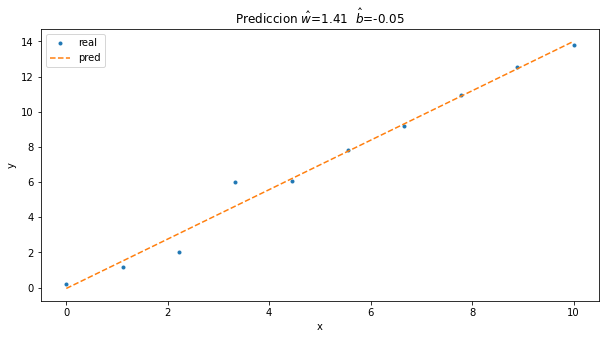

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(x, y, '.', label='real')
ax.plot(x, y_pred, '--', label='pred')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()
ax.set_title(r'Prediccion $\hat{w}$='+str(round(reg.coef_[0], 2))+'  $\hat{b}$='+str(round(reg.intercept_, 2)))

plt.show()

## Regresion Polinomial

Como deciamos anteriormente, si queremos buscar relaciones no lineales entre las variables debemos cambiar nuestra funcion base. Entonces,
\begin{eqnarray}
    \hat{y}(\boldsymbol{x}) & = & D_x\boldsymbol{w} + \epsilon \\ \\
     &=& \begin{bmatrix}
           1 & x_{0} & x_{0}^2 & ... & x_{0}^M \\
           1 & x_{1} & x_{1}^2 & ... & x_{1}^M\\
           \vdots & \vdots & \vdots & \ddots & \vdots \\
           1 & x_{N} & x_{N}^2 & ... & x_{N}^M
         \end{bmatrix} \begin{bmatrix} w_0 \\ w_1 \\ \cdots \\ w_D \end{bmatrix} + \epsilon \\\\
         y_i & = & \sum_{j=0}^M x_{ij}^jw_{j} + \epsilon_j
\end{eqnarray}

Donde $D_x$ es la matriz de diseno para $\boldsymbol{x}$

## Regresion Polinomial en Scikit-learn

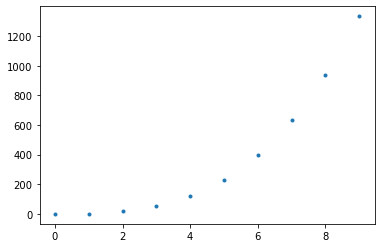

In [16]:
y_poly = 1.3*x**3 + x**2/3 + np.random.normal(0, 1, len(x))

plt.plot(y_poly, '.')
plt.show()

Primero debemos crear nuestra matriz de diseno

In [23]:
from sklearn.preprocessing import PolynomialFeatures

polyfeat = PolynomialFeatures(degree=3)
D_x = polyfeat.fit_transform(x[:,None])

Ahora ajustamos un modelo de regresion lineal utilizando la nueva entrada:

In [24]:
poly_reg = LinearRegression()
poly_reg = poly_reg.fit(D_x, y_poly)
y_pred_poly = poly_reg.predict(D_x)

Solo para comparar, ajustaremos una regresion lineal:

In [25]:
lineal_reg = LinearRegression()
lineal_reg = lineal_reg.fit(x[:, None], y_poly)
y_pred_lineal = lineal_reg.predict(x[:, None])

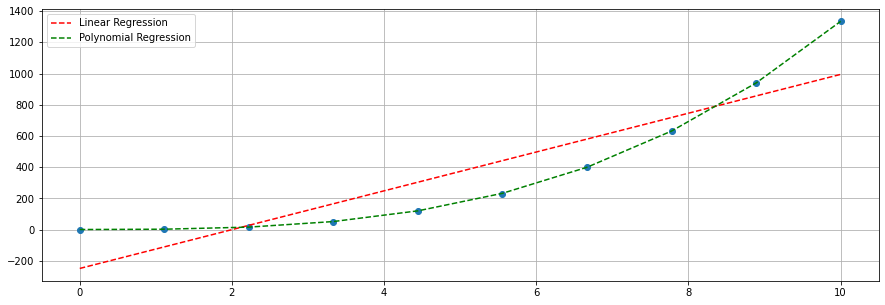

In [26]:
plt.figure(figsize=(15,5))
plt.plot(x, y_poly, 'o')
plt.plot(x, y_pred_lineal, '--r', label='Linear Regression')
plt.plot(x, y_pred_poly, '--g', label='Polynomial Regression')
plt.grid(True)
plt.legend()
plt.show()

## Bias–variance tradeoff (La dicotomia Varianza-sesgo)

Supongamos el siguiente conjunto de datos

In [27]:
x = np.sort(np.random.uniform(0, 10, 100))
ruido = np.random.normal(0, 40, len(x))
y = x**2 + x**2/2 + ruido

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x[:, None], y, test_size=0.5, random_state=42)

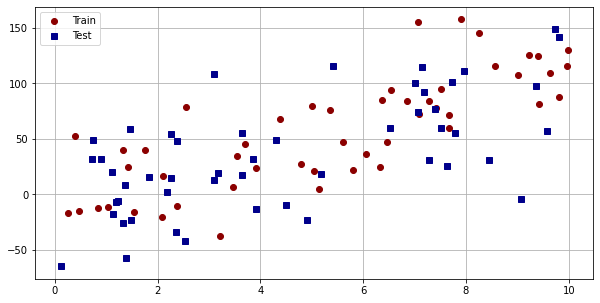

In [31]:
plt.figure(figsize=(10,5))
plt.plot(X_train, y_train, 'o', color='darkred', label='Train')
plt.plot(X_test, y_test, 's', color='darkblue', label='Test')
plt.grid(True)
plt.legend()
plt.show()

Asumiendo que no conocemos la funcion que genera estos puntos debemos ajustar el mejor modelo posible. Intentaremos con regresiones de distinto orden: 

In [33]:
from sklearn.metrics import mean_squared_error

In [38]:
predicciones = []
errores_train = []
errores_test = []
orden_list = range(0, 10, 1)
for i in orden_list:
    polyfeat = PolynomialFeatures(degree=i)
    D_x = polyfeat.fit_transform(X_train)

    poly_reg = LinearRegression()
    poly_reg = poly_reg.fit(D_x, y_train)
    y_pred = poly_reg.predict(D_x)
    
    predicciones.append(y_pred)
    errores_train.append(mean_squared_error(y_train, y_pred))
    
    # Test
    D_x = polyfeat.transform(X_test)
    y_pred = poly_reg.predict(D_x)
    errores_test.append(mean_squared_error(y_test, y_pred))

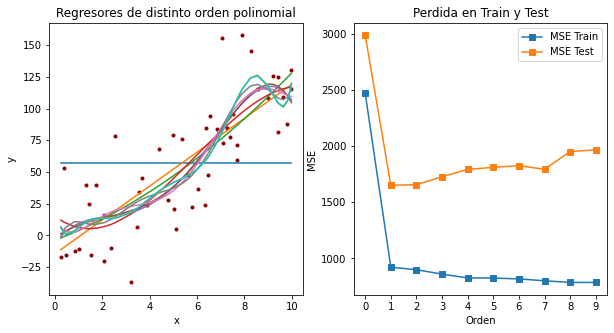

In [39]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(X_train, y_train, '.', color='darkred')
for pred in predicciones:
    indices = np.argsort(X_train[:, 0])
    axes[0].plot(X_train[:, 0][indices], pred[indices], '-')
axes[0].set_title('Regresores de distinto orden polinomial')
axes[0].set_ylabel('y')
axes[0].set_xlabel('x')


axes[1].plot(orden_list, errores_train, 's-',label='MSE Train')
axes[1].set_xticks(orden_list)
axes[1].grid()

axes[1].plot(orden_list, errores_test, 's-',label='MSE Test')
axes[1].set_xticks(orden_list)
axes[1].grid()

axes[1].legend()
axes[1].set_ylabel('MSE')
axes[1].set_xlabel('Orden')
axes[1].set_title('Perdida en Train y Test')
plt.show()

A medida que **aumentamos el orden** del polinomio **disminuye la perdida en el conjunto de entrenamiento**. Por consiguiente, la **prediccion del modelo variara de mayor manera** (aumenta la varianza). 

Por otro lado, cuando el **modelo es muy simple** (i.e., orden = 1) la **perdida igual crece**, **aumentando la diferencia entre la prediccion y la etiqueta correcta** (bias o sesgo). El caso trivial es una linea recta.

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543418451/tradeoff_sevifm.png" alt="BiasVariance" width="500" height="600"> 

En el ejemplo anterior **podemos evidenciar el sobreajuste** utilizando el **conjunto de test**. La perdida del test se minimiza cuando el orden = 2 (lo cual corresponde al valor teorico)

Sin embargo, podemos aplicar un **termino regularizador** que se preocupe del sobreajuste durante el entrenamiento

## Regresiones LASO y Ridge

LASO y Ridge son dos **extensiones** de la regresion lineal o polinomial. Basicamente **agregamos un termino regularizador** que **penaliza la funcion de costo**:
\begin{eqnarray}
    \mathcal{L}_{ridge} &=& \text{MSE} + \lambda||\boldsymbol{w}||^2_2 \\
                        &=& \text{MSE} + \lambda\sum_jw_j^2
\end{eqnarray}
\begin{eqnarray}
    \mathcal{L}_{lasso} &=& \text{MSE} + \lambda||\boldsymbol{w}||_1 \\
                        &=& \text{MSE} + \lambda\sum_j|w_j|
\end{eqnarray}

In [40]:
from sklearn.datasets import load_boston

In [41]:
boston=load_boston()
X = boston.data # Caracteristicas de la casa
y = boston.target # Precio

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### Ajustando Regresores

In [43]:
from sklearn.linear_model import Lasso, Ridge

In [44]:
lineal = LinearRegression()
lineal.fit(X_train, y_train)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [46]:
for model, name in zip([lineal, lasso, ridge], ['Lineal', 'Lasso', 'Ridge']):
    train_score = model.score(X_train, y_train)
    test_score  = model.score(X_test, y_test)

    print ("[{}] train score: {:.2f}".format(name, train_score))
    print ("[{}] test score: {:.2f}".format(name, test_score))
    print("")

[Lineal] train score: 0.77
[Lineal] test score: 0.69

[Lasso] train score: 0.76
[Lasso] test score: 0.68

[Ridge] train score: 0.77
[Ridge] test score: 0.69



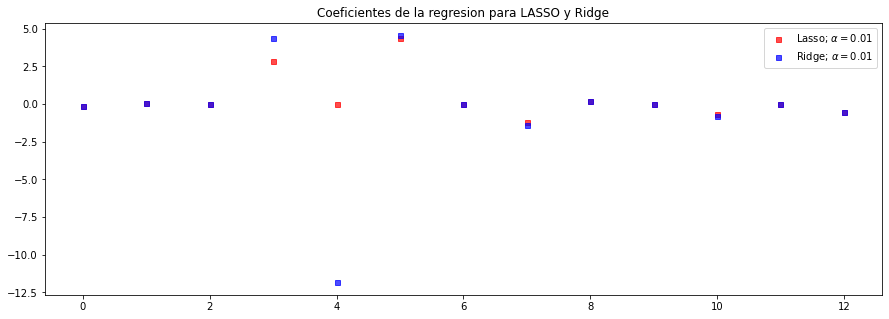

In [47]:
plt.figure(figsize=(15,5))
plt.plot(lasso.coef_ ,alpha=0.7, linestyle='none',
         marker='s',markersize=5,color='red',
         label=r'Lasso; $\alpha = 0.01$',zorder=7)

plt.plot(ridge.coef_ ,alpha=0.7, linestyle='none',
         marker='s',markersize=5,color='blue',
         label=r'Ridge; $\alpha = 0.01$',zorder=7)
plt.legend()
plt.title('Coeficientes de la regresion para LASSO y Ridge')
plt.show()

# Definiendo Hiperparametros
## Estrategia de Validacion Cruzada

### Como buscar el mejor modelo?

Usar validacion Cruzada (https://scikit-learn.org/stable/modules/cross_validation.html).
Yo utilizo validación cruzada para identificar que hiperparámetros utilizar en mi modelo. Validación cruzada crea todos los modelos posibles dado mi conjunto de hiperparámetros y su rango correspondiente (definidos por el usuario), divide el conjunto de datos utilizando el método KFold, para luego entrenar todos los modelos y validarlos.


Finalmente, validación cruzada nos entrega el modelo que tuvo el mejor desempeño.

Al utilizar validación cruzada, el modelo entrenado no se sobreajusta.

### Conjunto de datos
Para realizar validacion cruzada, debemos dividir nuestro conjunto de datos

*¿Por qué? Yo no puedo evaluar/probar mi modelo con el mismo conjunto de datos que uso para el entrenamiento*

**Conjunto de entrenamiento:** Usar para entrenar el modelo.

**Conjunto de validación:** Es un conjunto de datos distinto al conjunto de entrenamiento. Podemos sacar un porcentaje de nuestro conjunto de entrenamiento para usarlo como conjunto de validación. El conjunto de validación indica el rendimiento del modelo en el entrenamiento. Con él se puede ajustar los hiperparámetros de los modelos.

**Conjunto de prueba**: Conjunto de datos distinto al de entrenamiento y al de validación, sobre el cual evaluaremos el modelo.

#### KFold

<img src= "https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="600" height="400">

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [49]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)

In [50]:
alphas = np.arange(0.1, 10)
ridge_cv = RidgeCV(alphas=alphas)
lasso_cv = LassoCV(alphas=alphas)

In [51]:
# Fit the linear regression
model_ridge = ridge_cv.fit(X_std, y_train)
model_lasso = lasso_cv.fit(X_std, y_train)

In [52]:
# View alpha
print ('Mejor alpha ridge: ',model_ridge.alpha_)
print ('Mejor alpha lasso: ',model_lasso.alpha_)

Mejor alpha ridge:  9.1
Mejor alpha lasso:  0.1


In [53]:
X_test_std = scaler.transform(X_test)
print('LASSO: {:.2f} - Ridge: {:.2f}'.format(model_lasso.score(X_test_std, y_test), model_ridge.score(X_test_std, y_test)))

LASSO: 0.68 - Ridge: 0.69


# Evaluando Modelos de Regresion

In [47]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [61]:
print('R2    MAE  MSE')
for model in [lineal, ridge, lasso]:
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print('{:.2f} {:.2f} {:.2f}'.format(r2, mae, mse))

R2    MAE  MSE
0.69 3.40 25.18
0.69 3.40 25.26
0.68 3.41 25.71
